In [1]:
import matplotlib.pyplot as plt
import time
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display
import networkx as nx

In [2]:
url='https://www.janestreet.com/puzzles/pair-dance-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[8]+"\n\n"+str("\n".join(y[10:12]))))

### November 2015 : Puzzle

15 dancers are standing in an equilateral triangle formation, with every dancer
standing 1 unit apart from her nearest neighbors. Each dancer chooses another
who is 1 unit away to pair up with, and all but 1 dancer ends up as a part of a
pair. An example of one such arrangement is presented here.
How many different sets of 7 pairs are possible?

<img src='https://www.janestreet.com/puzzles/11_15_puzzle.png' width =150>

In [3]:
def nx_plot(edges):
    g = nx.Graph()
    for i in edges:
        g.add_edge(*i)
    fig, ax = plt.subplots(figsize=(3,3))
    pos = nx.spring_layout(g, seed=100)  
    options = {
        "font_size": 8,
        "node_size": 200,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 1,
        "width": 1,
        }
    nx.draw_networkx(g, pos, **options)
    plt.show()

In [4]:
# function to yield all possible pairs from a list
# https://stackoverflow.com/questions/5360220/how-to-split-a-list-into-pairs-in-all-possible-ways
def all_pairs(x):
    if len(x) < 2:
        yield []
        return
    if len(x) % 2 == 1:
        # Handle odd length list
        for i in range(len(x)):
            for result in all_pairs(x[:i] + x[i+1:]):
                yield result
    else:
        a = x[0]
        for i in range(1,len(x)):
            p = (a,x[i])
            for rest in all_pairs(x[1:i]+x[i+1:]):
                yield [p] + rest    

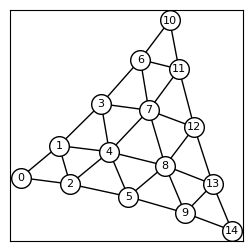

If we remove 0 there are 28 possible pairs
If we remove 1 there are 14 possible pairs
If we remove 2 there are 14 possible pairs
If we remove 3 there are 14 possible pairs
If we remove 4 there are 10 possible pairs
Solution is 240. Took 4.75 seconds


In [5]:
#define all edges
e = [(0, 1), (0, 2), 
     (1, 2),
     (1, 3), (1, 4), (2,4), (2, 5),
     (3,4),(4,5),
     (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (5, 9), 
     (6, 7), (7, 8), (8, 9),
     (6,10),(6,11),(7,11),(7,12),(8,12),(8,13),(9,13),(9,14),
     (10, 11), (11, 12), (12, 13), (13, 14)]

nx_plot(e)

# loop through all the nodes removing one at a time, working out all possible pairs where all edges exist and count
# speed up by taking account of the symmetries
start= time.time()
pairs = [] 
for i in range(5):
    nums = [*range(15)]
    nums.remove(i)
    num_pairs = len([i for i in all_pairs(nums) if all([x in e for x in i ])])
    print("If we remove {} there are {} possible pairs".format(i,num_pairs))
    pairs.append(num_pairs)

print("Solution is {}. Took {:.2f} seconds".format(sum(pairs)*3,time.time()-start))

In [6]:
url='https://www.janestreet.com/puzzles/pair-dance-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[8]+"\n\n"+str("\n".join(y[10:12]))))

### November 2015 : Solution

There are 240 possible sets of 7 pairs. The counting can get a bit tricky, but
categorizing by which type of dancer remains un-paired, and then reducing by
symmetry is a good place to start.
Congratulations to all of those who solved correctly, especially Shahmeer Navid,
this month’s randomly-chosen winner of a Jane Street t-shirt!